In [1]:
# Importação das bibliotecas
import pandas as pd
from sklearn import cluster as ct
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Carregamento dos dados
X = pd.read_csv( 'X_dataset.csv' )

In [3]:
# Medindo a performance utilizando o valor padrão de clusters do algoritmo
model = ct.AffinityPropagation(random_state=0 )
model.fit( X )

labels = model.predict( X )
ss_avg = mt.silhouette_score( X, labels )
round(ss_avg.item(), 3)

0.169

In [4]:
# Utilizando o Elbow Method para descobrir o melhor parâmetro de n_clusters
df_scores_params = pd.DataFrame(columns=['preference', 'clusters', 'SS'])

list_preferences = np.arange( -1, -60, -1 )

for i in list_preferences:
    model = ct.AffinityPropagation( preference = i, random_state=0 )
    model.fit(X)
    
    labels = model.predict( X )
    ss = mt.silhouette_score( X, labels )
    clusters = len(np.unique(labels))
    
    df_scores_params = df_scores_params._append({'preference': i, 'clusters': clusters, 'SS': ss }, ignore_index=True)   


C:\Users\gabri\AppData\Local\Temp\ipykernel_11820\1950816524.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores_params = df_scores_params._append({'preference': i, 'clusters': clusters, 'SS': ss }, ignore_index=True)
C:\Users\gabri\anaconda3\envs\dsml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Text(0, 0.5, 'Silhouette Score')

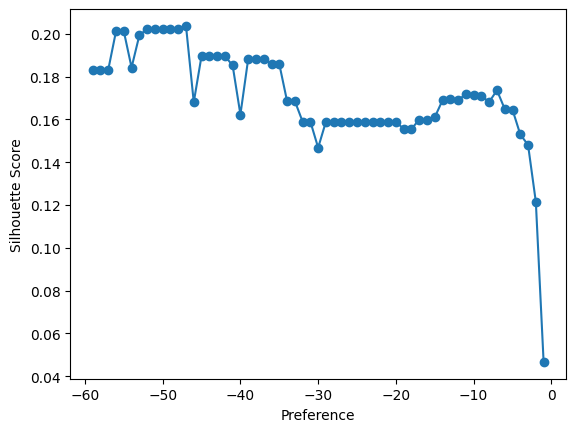

In [5]:
# Exibindo o gráfico com os valores de n_clusters e sua performance correpondente encontrada
preference = df_scores_params['preference']
ss_list = df_scores_params['SS']

plt.plot( preference, ss_list, marker='o' )
plt.xlabel( 'Preference' );
plt.ylabel( 'Silhouette Score' )


In [6]:
#Exibindo o melhor resultado de preference encontrado

max_index = df_scores_params['SS'].idxmax()
best_value = round(df_scores_params.loc[max_index, 'SS'], 3)
clusters = int(df_scores_params.loc[max_index, 'clusters'])

print(f"Melhor Resultado: {best_value}, utlizando {clusters} clusters")

Melhor Resultado: 0.204, utlizando 7 clusters
